In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates

In [2]:
def concat_dfs(folder_path):
    # folder_path = 'parsed_data/auxilio_emergencial'

    file_names = os.listdir(folder_path)

    df = pd.DataFrame([])

    total_rows = 0

    for file in file_names:
        date = file[:-4]
        path = os.path.join(folder_path, file)
        if df.empty:
            df = pd.read_csv(path)
            df["date"] = pd.to_datetime(date, format="%Y%m")
            total_rows += len(df)
        else:
            next_df = pd.read_csv(path)
            next_df["date"] = pd.to_datetime(date, format="%Y%m")
            total_rows += len(next_df)
            df = pd.concat([df, next_df], ignore_index=True)

    df.sort_values("date", ascending=True)

    assert len(df) == total_rows

    return df


In [3]:
auxilio_emergencial = concat_dfs("parsed_data/auxilio_emergencial")
bolsa_familia = concat_dfs("parsed_data/bolsa_familia")


In [4]:
# Substituir cod municipio siafi por ibge
municipios = pd.read_csv("raw_data/codigo_municipios/TABMUN.csv")

siafi_ibge_lookup = {}
for row in municipios.iterrows():
    cod_siafi = row[1]["cod_siafi"]
    cod_ibge = row[1]["cod_ibge"]

    siafi_ibge_lookup[cod_siafi] = cod_ibge

bolsa_familia["municipio_siafi"] = bolsa_familia["municipio_siafi"].replace(
    siafi_ibge_lookup
)

bolsa_familia.columns = ["municipio_ibge", "contagem", "soma", "date"]


In [5]:
df_all = pd.merge(bolsa_familia, auxilio_emergencial, on=['municipio_ibge', 'date'], how='outer')
df_all.columns = ['municipio_ibge', 'beneficiarios_bolsa_familia', 'valor_bolsa_familia', 'date', 'valor_auxilio_emergencial', 'beneficiarios_auxilio_emergencial']
df_all = df_all.fillna(0)

In [6]:
df_all['valor_total'] = df_all['valor_bolsa_familia'] + df_all['valor_auxilio_emergencial']

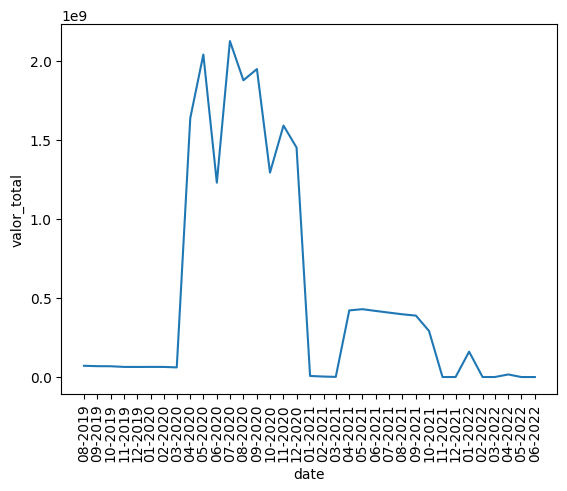

In [7]:
data = df_all[df_all['municipio_ibge'] == 3550308]
ax = sns.lineplot(data=data, x='date', y='valor_total')
ax.set(xticks=data.date.values)
ax.xaxis.set_major_formatter(dates.DateFormatter("%m-%Y"))
plt.xticks(rotation=90)
plt.show()

In [16]:
print(data[data['date'] == '2020-10-01']['valor_bolsa_familia'][38770])
print(data[data['date'] == '2020-10-01']['beneficiarios_bolsa_familia'][38770])

78620454.0
436035.0


In [15]:
print(data[data['date'] == '2020-10-01']['valor_auxilio_emergencial'][38770])
print(data[data['date'] == '2020-10-01']['beneficiarios_auxilio_emergencial'][38770])



1214108202.0
2444459.0


In [ ]:
1214108202.0
1248406602.0